In [2]:
import cv2 as cv

In [3]:
import os
import random

img = cv.imread('./att_faces/s1/1.pgm',cv.IMREAD_GRAYSCALE)

cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [32]:
import os
import glob
import random
import numpy as np

def loadDataset(dir_name='./att_faces'):
    sampleNum = 5
    X_train, Y_train, X_test, Y_test = [], [], [], []
    for i in range(40):
        img_path = dir_name+'/s'+str(i+1)+'/'
        sampled = random.sample(range(10), sampleNum)
        data = [cv.imread(d, 0) for d in glob.glob(os.path.join(img_path, '*.pgm'))]
        X_train.extend([data[i].ravel() for i in range(10) if i in sampled])
        X_test.extend([data[i].ravel() for i in range(10) if i not in sampled])
        Y_test.extend([i] * (10 - sampleNum))
        Y_train.extend([i] * sampleNum)
    return np.array(X_train), np.array(Y_train), np.array(X_test), np.array(Y_test)

In [68]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def pca_process(X_train, Y_train, X_test, dimension):
    pca = PCA(n_components=dimension)
    pca.fit(X_train, Y_train)
    X_train_trans = pca.transform(X_train)
    X_test_trans = pca.transform(X_test)
    return X_train_trans, X_test_trans

def lda_process(X_train, X_test, Y_train):
    lda = LDA()
    X_train = lda.fit_transform(X_train, Y_train)
    X_test = lda.transform(X_test)
    return X_train, X_test

In [59]:
from sklearn.ensemble import RandomForestClassifier

def rfc_model(dimension, X_train, X_test, Y_train, Y_test):
    model = RandomForestClassifier()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    print('dimension %d: RandomForestClassfier: %.2f%%' % (dimension, (pred == np.array(Y_test)).mean() * 100))
    return Y_test.tolist(), pred

In [57]:
def show_matrix_in_plot(name, dimension, con_mat):
    plt.imshow(con_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('{} Dimension {} Confusion matrix'.format(name, dimension))
    plt.colorbar()
    tick_marks = np.arange(4)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [64]:
dimension = 10
X_train, Y_train, X_test, Y_test = loadDataset()
X_train_trans, X_test_trans = pca_process(X_train, Y_train, X_test, dimension)
answer, predict = rfc_model(dimension, X_train_trans, X_test_trans, Y_train, Y_test)

dimension 10: RandomForestClassfier: 87.50%


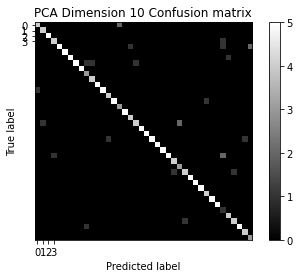

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(predict, answer)
show_matrix_in_plot('PCA', dimension, con_mat)

dimension 10: RandomForestClassfier: 88.50%


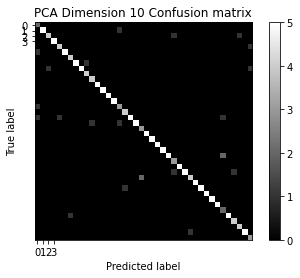

In [69]:
X_train, Y_train, X_test, Y_test = loadDataset()
X_train_trans, X_test_trans = pca_process(X_train, Y_train, X_test, dimension)
X_train_trans, X_test_trans = lda_process(X_train_trans, X_test_trans, Y_train)
answer, predict = rfc_model(dimension, X_train_trans, X_test_trans, Y_train, Y_test)

con_mat = confusion_matrix(predict, answer)
show_matrix_in_plot('PCA', dimension, con_mat)